# Inpainting using Stable Diffusion

Examples of applications:

* Remove objects or imperfections in images
* Repair damaged or missing frames.
* Improve the quality of medical images
* ([Other examples](https://www.google.com/search?q=inpainting+examples&sxsrf=APwXEdcmKQjdKjNqZG7LSGdZmk_B3Wf27g:1683903400360&source=lnms&tbm=isch&sa=X&ved=2ahUKEwicuI6AhfD-AhW4qZUCHS1aAWsQ_AUoAXoECAEQAw&biw=1920&bih=880&dpr=1))

## Installing the libraries

In [ ]:
!pip install fastapi
!pip install python-multipart
!pip install uvicorn
!pip install typing-extensions
!pip install torch
!pip install kaleido
!pip install diffusers
!pip install accelerate transformers ftfy bitsandbytes gradio natsort safetensors xformers
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are in

## Loading the model

- More information about the model: https://huggingface.co/runwayml/stable-diffusion-inpainting

In [ ]:
import numpy as np
import torch
import PIL
from PIL import Image
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline

pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
pipe = pipeline.to("cuda")

pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

# from diffusers import StableDiffusionInpaintPipeline
# inpainting_model = "runwayml/stable-diffusion-inpainting"
# device = "cuda"
# pipe = StableDiffusionInpaintPipeline.from_pretrained(inpainting_model, torch_dtype=torch.float16).to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cu118)
    Python  3.10.13 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


NotImplementedError: ignored

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
inpainting_model = "runwayml/stable-diffusion-inpainting"
device = "cuda"
pipe = StableDiffusionInpaintPipeline.from_pretrained(inpainting_model, torch_dtype=torch.float16).to(device)

In [ ]:
pipe.enable_attention_slicing()
pipe.enable_xformers_memory_efficient_attention()

NotImplementedError: ignored

In [ ]:
def grid_img(imgs, rows=1, cols=3, scale=1):
  assert len(imgs) == rows * cols

  w, h = imgs[0].size
  w, h = int(w*scale), int(h*scale)

  grid = Image.new('RGB', size=(cols*w, rows*h))
  grid_w, grid_h = grid.size

  for i, img in enumerate(imgs):
      img = img.resize((w,h), Image.ANTIALIAS)
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

## Loading the image

- Image source: https://unsplash.com/pt-br/fotografias/5sI6fQgYIuo


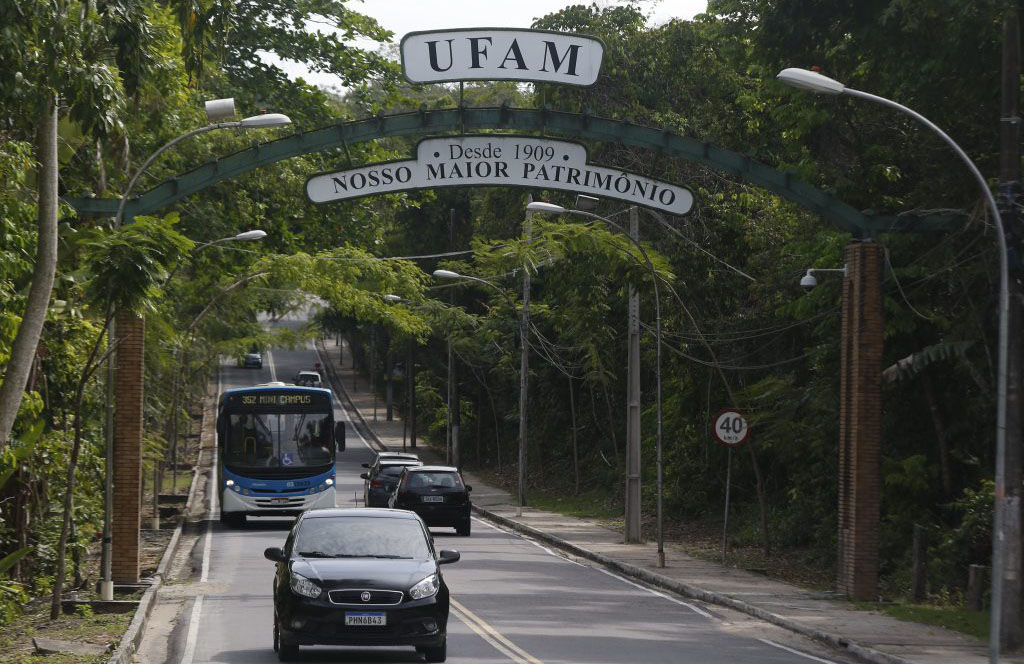

In [ ]:
img_path = '/content/ufam_1.jpg'
img = Image.open(img_path)
img

In [ ]:
img.size

## Loading the mask

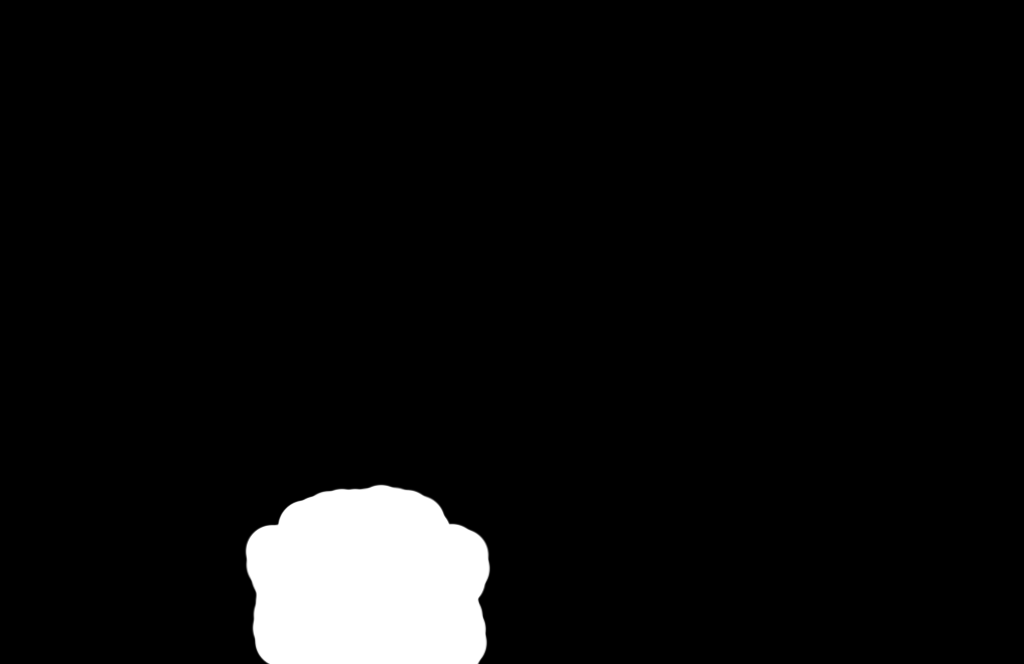

In [ ]:
mask_path = '/content/ufam_1_mask.png'
img_mask = Image.open(mask_path)
img_mask

In [ ]:
img_mask.size

In [ ]:
seed = 777

## Creating the prompt

In [ ]:
prompt = "motorcycle"

generator = torch.Generator(device='cuda').manual_seed(777)
w, h = img.size[0], img.size[1]
result_img = pipe(
    prompt = prompt,
    image = img,
    mask_image = img_mask,
    width=w,
    height=h,
    generator=generator).images[0]

result_img

  0%|          | 0/50 [00:00<?, ?it/s]

## Exchanging the objects

  0%|          | 0/50 [00:00<?, ?it/s]

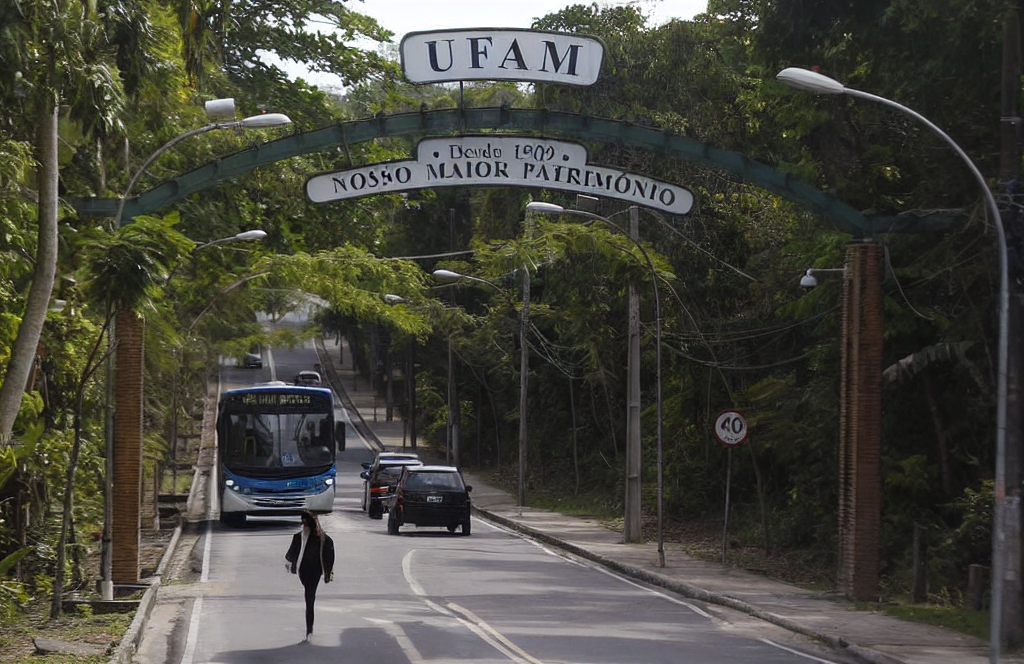

In [ ]:
prompt = "a woman"

generator = torch.Generator(device='cuda').manual_seed(seed)
w, h = img.size[0], img.size[1]
result_img = pipe(
    prompt = prompt,
    image = img,
    mask_image = img_mask,
    width=w,
    height=h,
    generator=generator).images[0]

result_img

  0%|          | 0/50 [00:00<?, ?it/s]

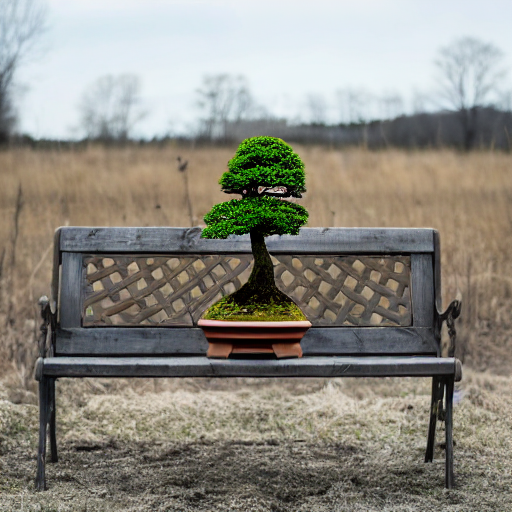

In [ ]:
prompt = "a bonsai tree"

generator = torch.Generator(device="cuda").manual_seed(seed)

result_img3 = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    generator=generator).images[0]

result_img3

## Comparing the results

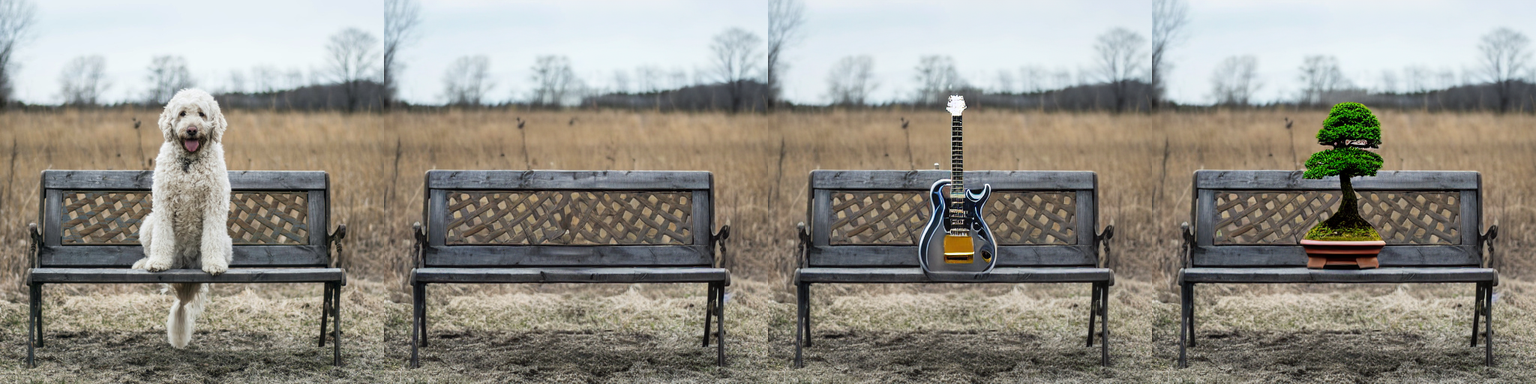

In [ ]:
imgs = [img, result_img, result_img2, result_img3]
grid_img(imgs, rows=1, cols=len(imgs), scale=0.75)

### Other image

- Image source: https://www.freepik.com/free-photo/attractive-young-woman-walking-autumn-wearing-jacket-using-phone_27289740.htm



<ipython-input-4-d1ba74590e24>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((w,h), Image.ANTIALIAS)


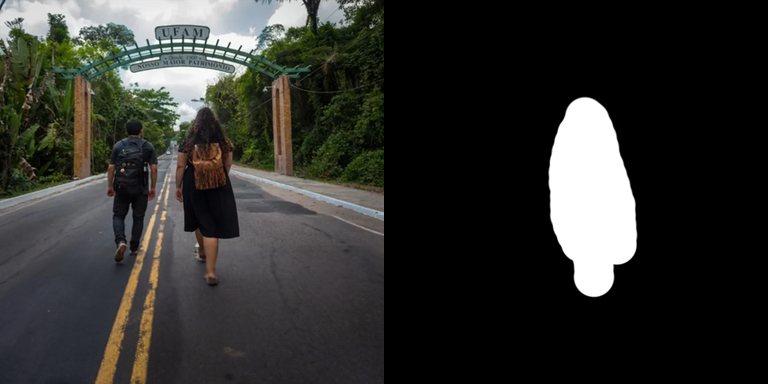

In [ ]:
img_path = "/content/ufam_3.png"
mask_path = "/content/ufam_3_mask.png"

img = Image.open(img_path)
img_mask = Image.open(mask_path)

grid_img([img, img_mask], rows=1, cols=2, scale=0.75)

In [ ]:
img.size

(512, 512)

In [ ]:
w, h = img.size[0], img.size[1]
print(w, h)

512 512


In [ ]:
prompt = ""

generator = torch.Generator(device='cuda').manual_seed(777)
result_img4 = pipe(
    prompt = prompt,
    image = img,
    mask_image = img_mask,
    width=w,
    height=h,
    generator=generator).images[0]
result_img

NameError: ignored

### Generating multiple images


  0%|          | 0/50 [00:00<?, ?it/s]

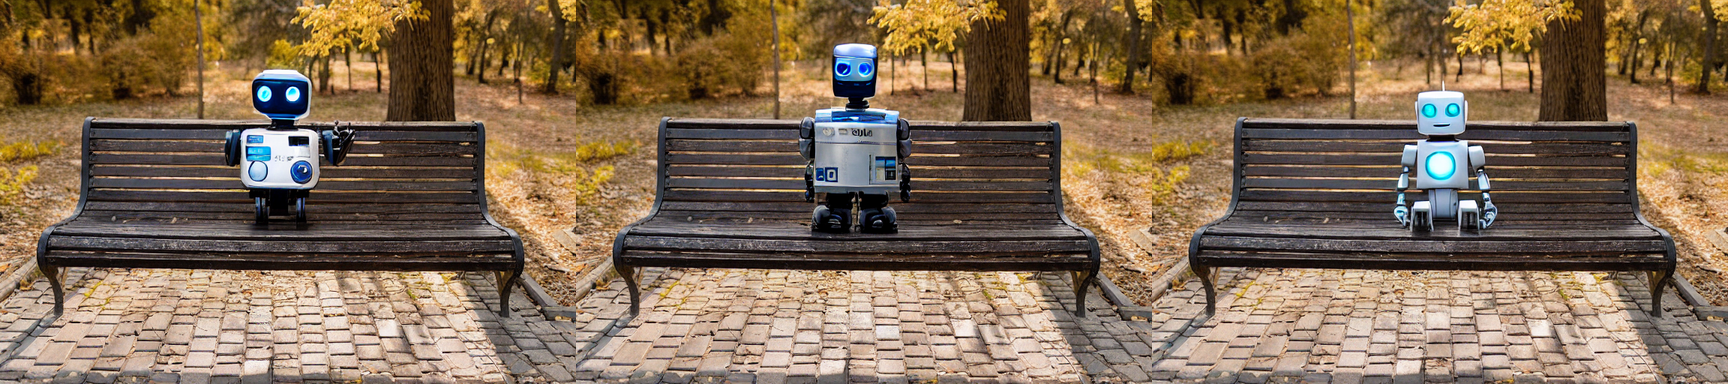

In [ ]:
prompt = "a robot sitting on a bench"
num_imgs = 3

generator = torch.Generator(device="cuda").manual_seed(seed)

imgs = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    width=w,
    height=h,
    num_images_per_prompt=num_imgs,
    generator=generator).images

grid_img(imgs, rows=1, cols=len(imgs), scale=0.75)

## Other examples

- Image source: https://unsplash.com/pt-br/fotografias/_K0sTUUHQDE

640 426


<ipython-input-4-d1ba74590e24>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((w,h), Image.ANTIALIAS)


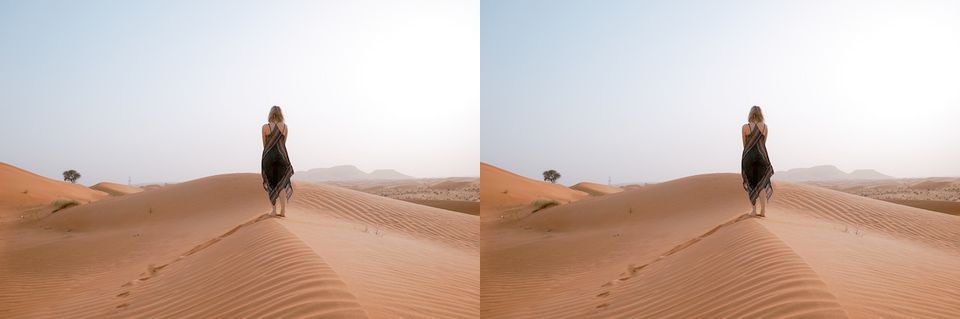

In [ ]:
img_path = "/content/toa-heftiba-_K0sTUUHQDE-unsplash.jpg"
mask_path = "/content/toa-heftiba-_K0sTUUHQDE-unsplash.jpg"

img = Image.open(img_path)
img_mask = Image.open(mask_path)
img.size
w, h = img.size[0], img.size[1]
print(w, h)

grid_img([img, img_mask], rows=1, cols=2, scale=0.75)

In [ ]:
prompt = "desert"

generator = torch.Generator(device="cuda").manual_seed(seed)

result_img = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    width=w,
    height=h,
    generator=generator).images[0]

result_img

ValueError: ignored

  0%|          | 0/50 [00:00<?, ?it/s]

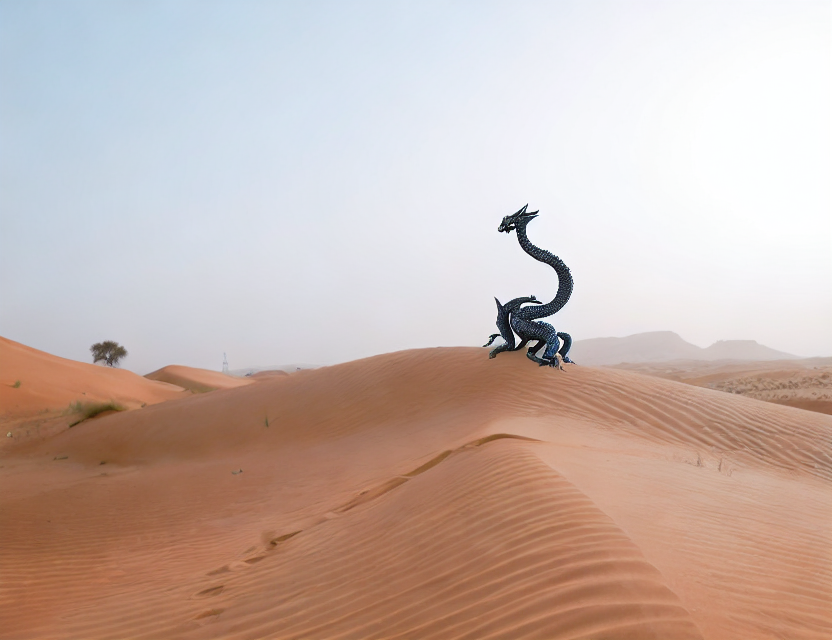

In [ ]:
prompt = "a dragon in the desert"

generator = torch.Generator(device="cuda").manual_seed(seed)

result_img = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    width=w,
    height=h,
    generator=generator).images[0]

result_img

  0%|          | 0/50 [00:00<?, ?it/s]

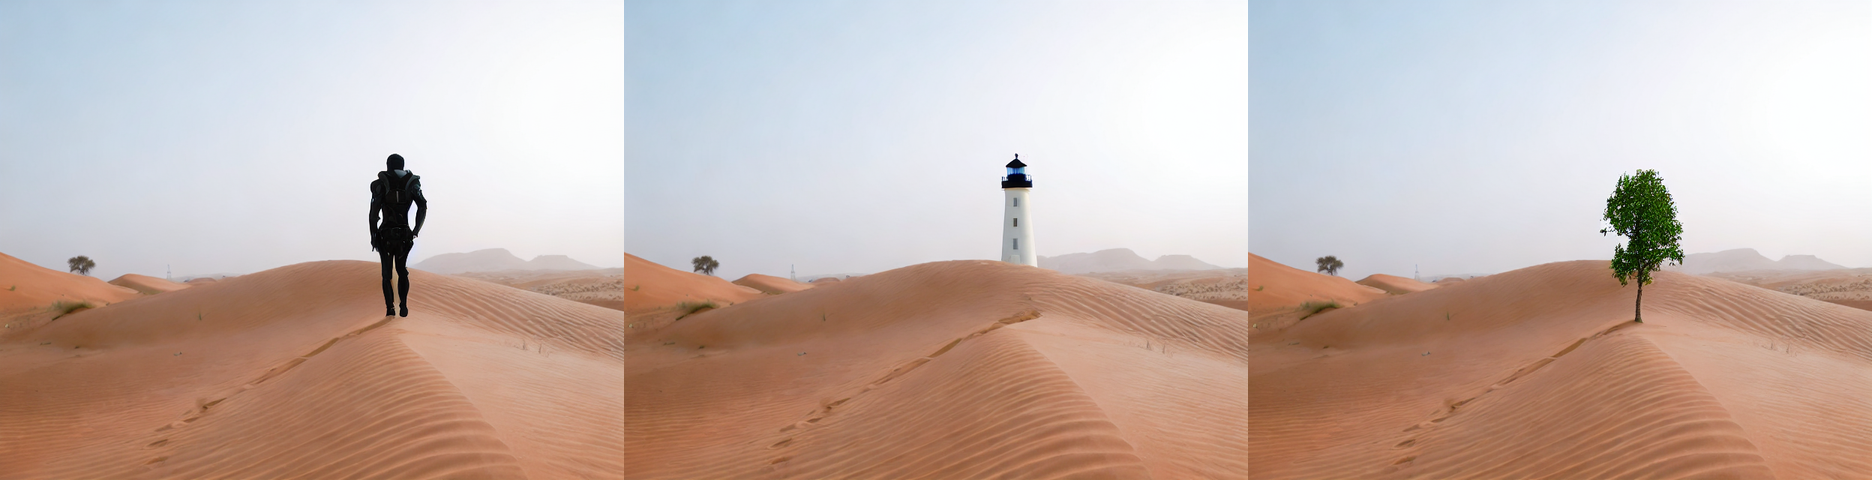

In [ ]:
prompt = ["an android walking in the desert",
          "a lighthouse in the desert",
          "a tree in the desert"]

guidance_scale = 6.5
num_samples = 1
generator = torch.Generator(device="cuda").manual_seed(seed)

imgs = pipe(
    prompt=prompt,
    image=img,
    mask_image=img_mask,
    guidance_scale=guidance_scale,
    width=w,
    height=h,
    generator=generator,
    num_images_per_prompt=num_samples,
).images

grid_img(imgs, rows=1, cols=len(imgs), scale=0.75)

* Other inpainting models: https://huggingface.co/models?library=diffusers&sort=downloads&search=inpainting
